# Naive Bayes Gaussian - Babies,  Teens and Adults 

### Generating some training data

Each indiviudal has two atributes (x0,x1) 
* x0  is heigth and 
* x1  is weight 

There are two clases of individuals
* Babies,
* Teens  and 
* adults
    
We generate  training examples 
* 50 babies ~ Gaussian([60, 30], [[50,15],[15, 30]])
* 70 teens ~ Gaussian([120, 50], [[90,10 ],[10, 40]])
* 120 adults ~ Gaussian([150, 80], [[60, 10],[10, 40]])

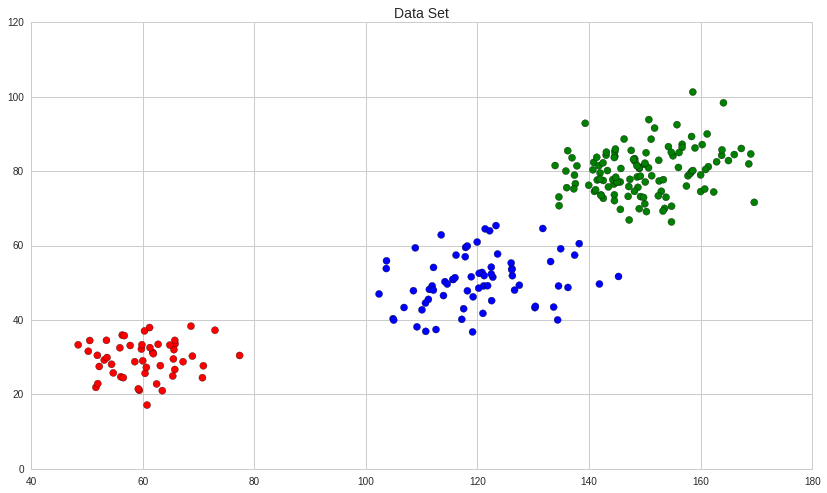

In [14]:
import numpy as np
import matplotlib.pyplot as plt

babies = np.random.multivariate_normal([60, 30], [[50,15 ],[15, 30]], 50)
teens = np.random.multivariate_normal([120, 50], [[90, 10],[10, 40]], 70)
adults = np.random.multivariate_normal([150, 80], [[60, 10],[10, 40]], 120)
x = np.concatenate((babies, teens ,adults),axis=0)

y1 = np.empty(len(babies))
y2 = np.empty(len(teens))
y3 = np.empty(len(adults))
y1.fill(0)
y2.fill(1)
y3.fill(2)
y = np.concatenate((y1,y2,y3),axis=0)
color = []
for v in y:
    if (v == 0): color.append('red')
    elif(v == 1): color.append('blue')
    else: color.append('green')
plt.scatter(x[:,0], x[:,1], c=color, s=50)
plt.title('Data Set', size=14);

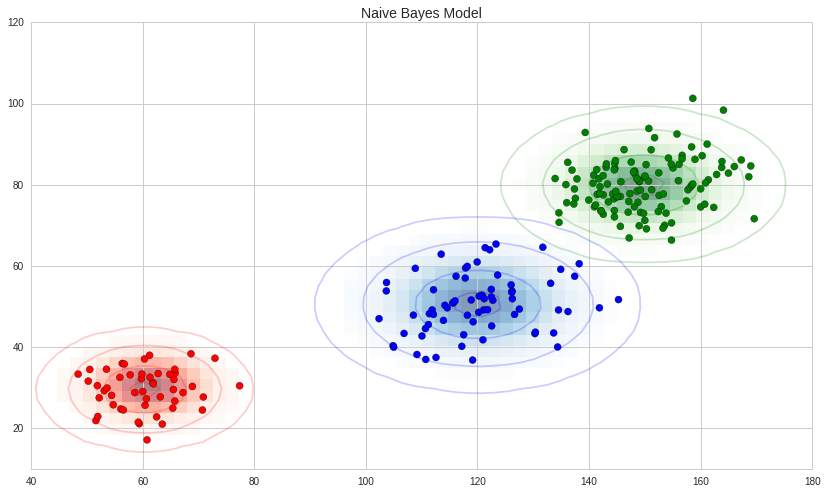

In [15]:
fig, ax = plt.subplots()
color = []
for v in y:
    if (v == 0): color.append('red')
    elif(v == 1): color.append('blue')
    else: color.append('green')
ax.scatter(x[:,0], x[:,1],  c=color, s=50);
ax.set_title('Naive Bayes Model', size=14)
xlim = (40, 180)
ylim = (10, 120)

xg = np.linspace(xlim[0], xlim[1], 60)
yg = np.linspace(ylim[0], ylim[1], 40)
xx, yy = np.meshgrid(xg, yg)
Xgrid = np.vstack([xx.ravel(), yy.ravel()]).T

for label, color in enumerate(['red', 'blue', 'green']):
    mask = (y == label)
    mu, std = x[mask].mean(0), x[mask].std(0)
    P = np.exp(-0.5 * (Xgrid - mu) ** 2 / std ** 2).prod(1)
    Pm = np.ma.masked_array(P, P < 0.03)
    ax.pcolorfast(xg, yg, Pm.reshape(xx.shape), alpha=0.5,
                  cmap=color.title() + 's')
    ax.contour(xx, yy, P.reshape(xx.shape),
               levels=[0.01, 0.1, 0.5, 0.9],
               colors=color, alpha=0.2)
    
ax.set(xlim=xlim, ylim=ylim);

In [16]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x, y);

### The desicion boundary in Gaussian naive Bayes is quadratic.

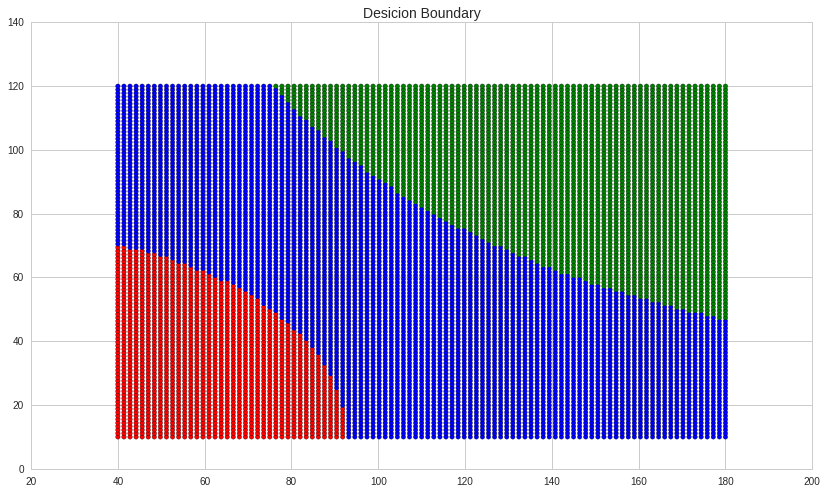

In [18]:
x0 =  np.linspace(40,180,101)
x1 =  np.linspace(10,120,101)
g = np.meshgrid(x0,x1)
xmesh = np.append(g[0].reshape(-1,1),g[1].reshape(-1,1),axis=1)
ymesh= model.predict(xmesh)
colormesh = []
for v in ymesh:
    if (v == 0): colormesh.append('red')
    elif(v == 1): colormesh.append('blue')
    else: colormesh.append('green')
plt.scatter(xmesh[:, 0], xmesh[:, 1], c=colormesh )
plt.title('Desicion Boundary', size=14);

### Testing the model with some random data

In [24]:
rng = np.random.RandomState(0)
xnew = [40, 10] + [180, 120] * rng.rand(500, 2) 
ynew = model.predict(xnew)

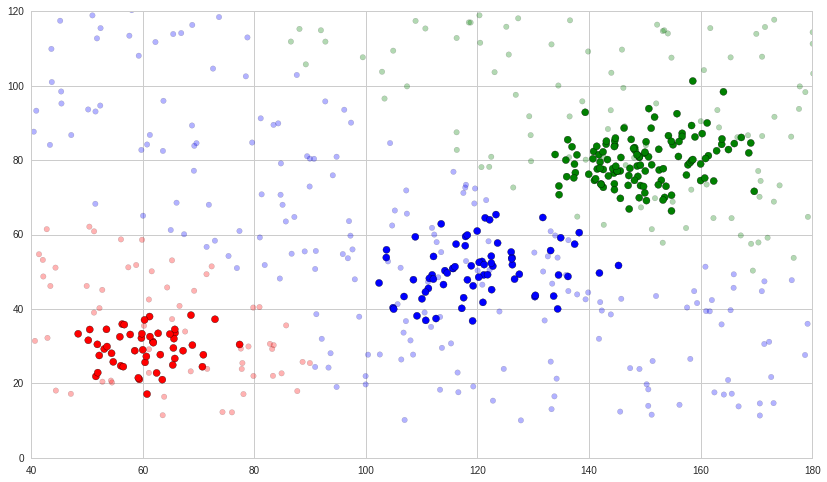

In [25]:
color = []
for v in y:
    if (v == 0): color.append('red')
    elif(v == 1): color.append('blue')
    else: color.append('green')
plt.scatter(x[:,0].tolist(), x[:,1].tolist(),  c=color, s=50);
lim = plt.axis()

colornew = []
for v in ynew:
    if (v == 0): colornew.append('red')
    elif(v == 1): colornew.append('blue')
    else: colornew.append('green')
plt.scatter(xnew[:, 0], xnew[:, 1], c=colornew, s=30,  alpha=0.3)
plt.axis(lim);

### Pobabilistic classification - posterior probabilities for the classes

In [26]:
xnew[-20:].round(2)

array([[  79.62,   84.75],
       [  60.07,   65.08],
       [  98.02,   47.98],
       [ 126.87,   97.58],
       [  52.45,  115.5 ],
       [ 172.27,   31.18],
       [ 209.05,   70.76],
       [ 219.97,   33.67],
       [ 136.28,   44.83],
       [  94.75,   80.93],
       [ 205.91,  106.63],
       [ 170.31,   77.1 ],
       [ 206.01,   69.08],
       [ 197.29,  110.08],
       [  78.49,  102.55],
       [  42.19,   48.74],
       [  81.32,   70.82],
       [ 172.63,   21.72],
       [ 132.69,  122.61],
       [  81.16,   91.26]])

In [27]:
yprob = model.predict_proba(xnew[-20:])
yprob.round(2)

array([[ 0.  ,  1.  ,  0.  ],
       [ 0.02,  0.98,  0.  ],
       [ 0.  ,  1.  ,  0.  ],
       [ 0.  ,  0.  ,  1.  ],
       [ 0.  ,  1.  ,  0.  ],
       [ 0.  ,  1.  ,  0.  ],
       [ 0.  ,  0.  ,  1.  ],
       [ 0.  ,  0.99,  0.01],
       [ 0.  ,  1.  ,  0.  ],
       [ 0.  ,  1.  ,  0.  ],
       [ 0.  ,  0.  ,  1.  ],
       [ 0.  ,  0.  ,  1.  ],
       [ 0.  ,  0.  ,  1.  ],
       [ 0.  ,  0.  ,  1.  ],
       [ 0.  ,  1.  ,  0.  ],
       [ 1.  ,  0.  ,  0.  ],
       [ 0.  ,  1.  ,  0.  ],
       [ 0.  ,  1.  ,  0.  ],
       [ 0.  ,  0.  ,  1.  ],
       [ 0.  ,  1.  ,  0.  ]])

## References

1. Naive Bayes 3: Gaussian example  Victor Lavrenko  https://www.youtube.com/watch?v=r1in0YNetG8&list=PLBv09BD7ez_7-4V3IJIzCHWQj9nd4rVWB&index=3
2. In Depth: Naive Bayes Classification https://jakevdp.github.io/PythonDataScienceHandbook/06.00-figure-code.html#Gaussian-Naive-Bayes
3. 6 Easy Steps to Learn Naive Bayes Algorithm (with codes in Python and R)
https://www.analyticsvidhya.com/blog/2017/09/naive-bayes-explained/
 
